In [1]:
#Mount Gooogle Drive (Location of Dataset)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Read in CAV Cybersecurity Dataset
import pandas as pd
from pandas import read_excel
df = read_excel('/content/drive/My Drive/CAV-KDD.xlsx')
print(df.head())

   duration protocol_type  ... dst_host_srv_rerror_rate attack_label
0         0           udp  ...                      0.0      normal.
1         0           udp  ...                      0.0      normal.
2         0           udp  ...                      0.0      normal.
3         0           udp  ...                      0.0      normal.
4         0           udp  ...                      0.0      normal.

[5 rows x 42 columns]


In [3]:
#Prior to Label Encoding
print(df.iloc[1500])
print(df.iloc[1])
print(df.iloc[171000])

duration                            0
protocol_type                    icmp
service                         ecr_i
flag                               SF
src_bytes                        1032
dst_bytes                           0
land                                0
wrong_fragment                      0
urgent                              0
hot                                 0
num_failed_logins                   0
logged_in                           0
num_compromised                     0
root_shell                          0
su_attempted                        0
num_root                            0
num_file_creations                  0
num_shells                          0
num_access_files                    0
num_outbound_cmds                   0
is_host_login                       0
is_guest_login                      0
count                             509
srv_count                         509
serror_rate                         0
srv_serror_rate                     0
rerror_rate 

In [4]:
#Label Encoding
cat_features=['protocol_type', 'service', 'flag']

from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

for col in cat_features:
    if col in df.columns:
        i = df.columns.get_loc(col)
        df.iloc[:,i] = df.apply(lambda i:le.fit_transform(i.astype(str)), axis=0, result_type='expand')

In [5]:
#Test to see success of label encoding
print(df.iloc[1500])
print(df.iloc[1])
print(df.iloc[171000])

duration                            0
protocol_type                       0
service                            14
flag                                9
src_bytes                        1032
dst_bytes                           0
land                                0
wrong_fragment                      0
urgent                              0
hot                                 0
num_failed_logins                   0
logged_in                           0
num_compromised                     0
root_shell                          0
su_attempted                        0
num_root                            0
num_file_creations                  0
num_shells                          0
num_access_files                    0
num_outbound_cmds                   0
is_host_login                       0
is_guest_login                      0
count                             509
srv_count                         509
serror_rate                         0
srv_serror_rate                     0
rerror_rate 

Feature: 0, Score: 0.00585
Feature: 1, Score: 0.12291
Feature: 2, Score: 0.10592
Feature: 3, Score: 0.05767
Feature: 4, Score: 0.12581
Feature: 5, Score: 0.03567
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00191
Feature: 8, Score: 0.00001
Feature: 9, Score: 0.00005
Feature: 10, Score: 0.00129
Feature: 11, Score: 0.02613
Feature: 12, Score: 0.00002
Feature: 13, Score: 0.00003
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00001
Feature: 16, Score: 0.00002
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00009
Feature: 22, Score: 0.08256
Feature: 23, Score: 0.09080
Feature: 24, Score: 0.00448
Feature: 25, Score: 0.00493
Feature: 26, Score: 0.00144
Feature: 27, Score: 0.00092
Feature: 28, Score: 0.08345
Feature: 29, Score: 0.05043
Feature: 30, Score: 0.00391
Feature: 31, Score: 0.00712
Feature: 32, Score: 0.02702
Feature: 33, Score: 0.03548
Feature: 34, Score: 0.01773
Feature: 35, Score: 0.08021
Fe

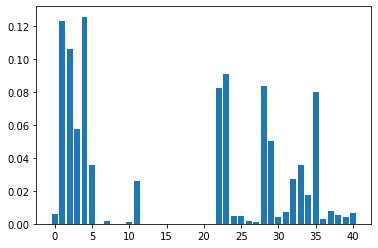

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
model = RandomForestClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()


In [6]:
#Subset Data (Feature Selection)
df = df[['protocol_type', 'service', 'flag', 'count','srv_count','same_srv_rate','dst_host_srv_count','dst_host_same_srv_rate','dst_host_same_src_port_rate', 'attack_label']].copy()


In [7]:
#Split Dataset into Training-Testing Dataset
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y, 
                                                    test_size=0.33)

In [8]:
#Train Naive Bayes
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=False,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

None


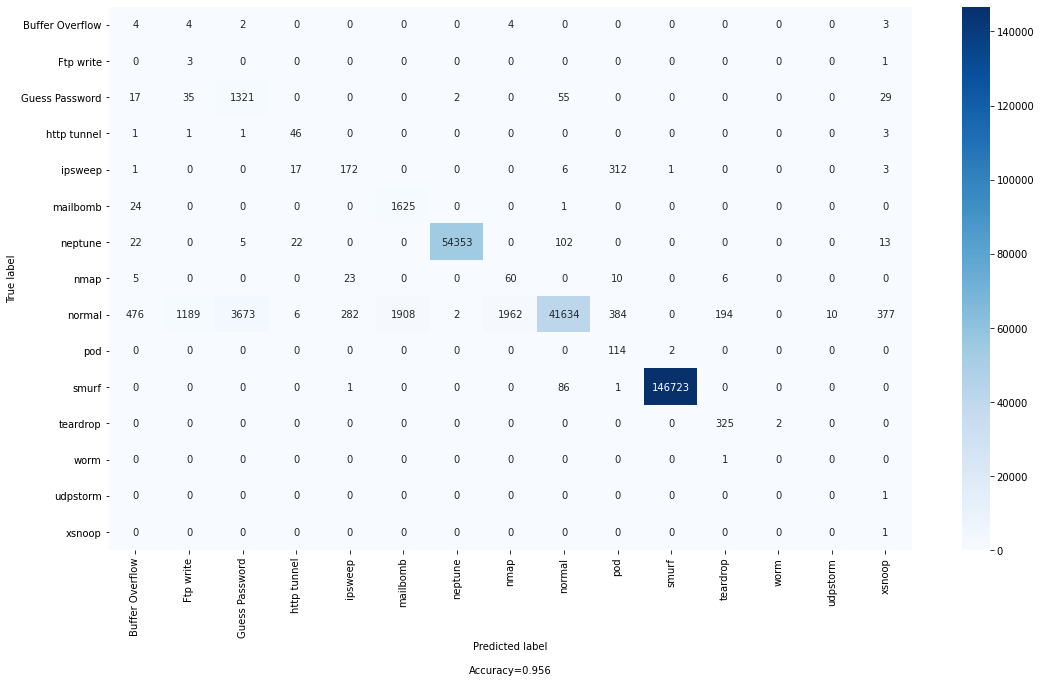

In [10]:
from sklearn.model_selection import cross_val_predict
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(make_confusion_matrix(cf = cm, categories=['Buffer Overflow', 'Ftp write', 'Guess Password', 'http tunnel', 'ipsweep', 'mailbomb', 'neptune', 'nmap', 'normal', 'pod', 'smurf' , 'teardrop', 'worm', 'udpstorm', 'xsnoop'] ,sum_stats = True, figsize = (18,10)))

In [11]:
#Metrics
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

precision = precision_score(y_test, y_pred,  average='macro')
print('Precision: %.3f' % precision)
recall = recall_score(y_test, y_pred, average='macro')
print('Recall: %.3f' % recall)
score = f1_score(y_test, y_pred, average='macro')
print('F-Measure: %.3f' % score)

Precision: 0.359
Recall: 0.696
F-Measure: 0.400


In [12]:
#Accuracies on Each Class
cf = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print(cf.diagonal())



[0.23529412 0.75       0.90541467 0.88461538 0.3359375  0.98484848
 0.99699176 0.57692308 0.7991631  0.98275862 0.99940059 0.99388379
 0.         0.         1.        ]


In [13]:
buff = cf.diagonal()[0]
x = []
for i in range(0,15):
  x.append(cf.diagonal()[i])


print('Buffer Overflow: %.3f' % x[0])
print('FTP_Write %.3f' % x[1])
print('Guess Password: %.3f' % x[2])
print('http tunnel: %.3f' % x[3])
print('ipsweep: %.3f' % x[4])
print('mailbomb: %.3f' % x[5])
print('neptune: %.3f' % x[6])
print('nmap: %.3f' % x[7])
print('normal: %.3f' % x[8])
print('pod: %.3f' % x[9])
print('smurf: %.3f' % x[10])
print('teardrop: %.3f' % x[11])
print('worm: %.3f' % x[12])
print('udpstorm: %.3f' % x[13])
print('xsnoop: %.3f' % x[14])


Buffer Overflow: 0.235
FTP_Write 0.750
Guess Password: 0.905
http tunnel: 0.885
ipsweep: 0.336
mailbomb: 0.985
neptune: 0.997
nmap: 0.577
normal: 0.799
pod: 0.983
smurf: 0.999
teardrop: 0.994
worm: 0.000
udpstorm: 0.000
xsnoop: 1.000


In [16]:
from collections import Counter

#Count amount of each class in test and training
counter = Counter(y_test)
print(counter)
counter_train  = Counter(y_train)
print(counter_train)

Counter({'smurf.': 146811, 'neptune.': 54517, 'normal.': 52097, 'mailbomb.': 1650, 'guess_passwd.': 1459, 'ipsweep.': 512, 'teardrop.': 327, 'pod.': 116, 'nmap.': 104, 'httptunnel.': 52, 'buffer_overflow.': 17, 'ftp_write.': 4, 'worm.': 1, 'xsnoop.': 1, 'udpstorm.': 1})
Counter({'smurf.': 298070, 'neptune.': 110685, 'normal.': 105774, 'mailbomb.': 3350, 'guess_passwd.': 2961, 'ipsweep.': 1041, 'teardrop.': 664, 'pod.': 235, 'nmap.': 211, 'httptunnel.': 106, 'buffer_overflow.': 35, 'ftp_write.': 7, 'xsnoop.': 3, 'worm.': 1, 'udpstorm.': 1})


In [48]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler 

#Random Over Sampling to Duplicate
strategy = { 'xsnoop.': 6, 'worm.': 6, 'udpstorm.': 6}
oversample = RandomOverSampler(sampling_strategy= strategy)
X_train_over, y_train_over= oversample.fit_resample(X_train, y_train)

#SMOTE
strategy = { 'buffer_overflow.': 20000,'ftp_write.': 60000, 'httptunnel.': 60000, 'worm.': 60000, 'udpstorm.': 60000, 'ipsweep.':40000, 'nmap.': 90000}
oversample = SMOTE(sampling_strategy= strategy, k_neighbors=4)
X_train_over, y_train_over= oversample.fit_resample(X_train_over, y_train_over)


print(Counter(y_train_over))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

Counter({'smurf.': 298070, 'neptune.': 110685, 'normal.': 105774, 'nmap.': 90000, 'httptunnel.': 60000, 'worm.': 60000, 'ftp_write.': 60000, 'udpstorm.': 60000, 'ipsweep.': 40000, 'buffer_overflow.': 20000, 'mailbomb.': 3350, 'guess_passwd.': 2961, 'teardrop.': 664, 'pod.': 235, 'xsnoop.': 6})


In [49]:
from sklearn.naive_bayes import GaussianNB
classifier_over = GaussianNB()
classifier_over.fit(X_train_over, y_train_over)

GaussianNB(priors=None, var_smoothing=1e-09)

None


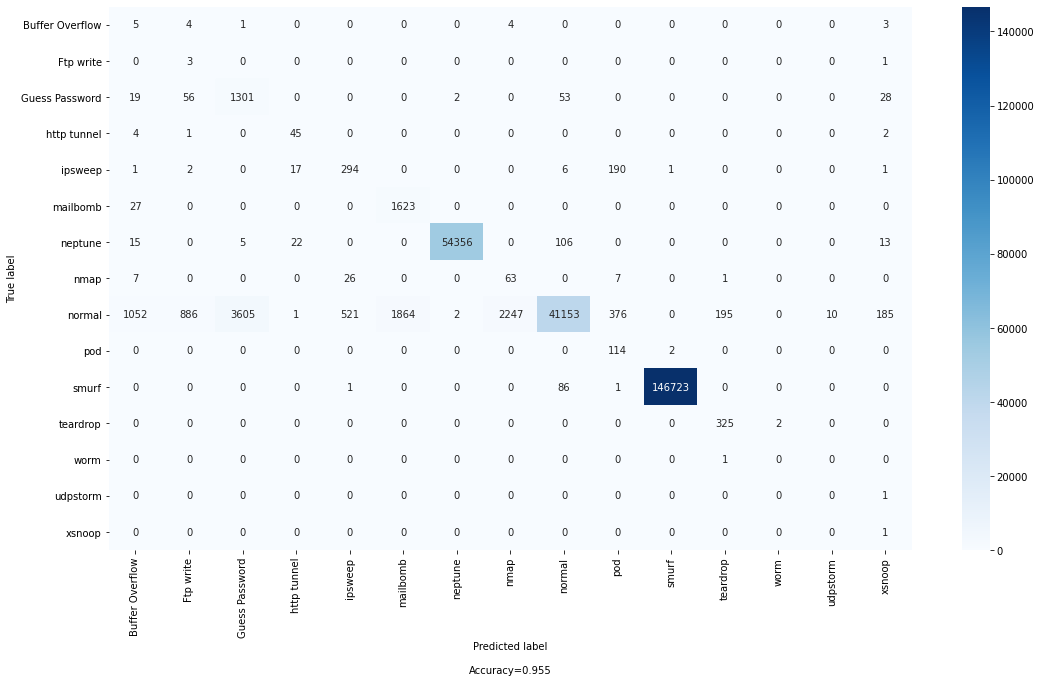

In [50]:
from sklearn.model_selection import cross_val_predict
y_pred_over_2 = classifier_over.predict(X_test)
from sklearn.metrics import confusion_matrix
cm_over = confusion_matrix(y_test, y_pred_over_2)
print(make_confusion_matrix(cf = cm_over, categories=['Buffer Overflow', 'Ftp write', 'Guess Password', 'http tunnel', 'ipsweep', 'mailbomb', 'neptune', 'nmap', 'normal', 'pod', 'smurf' , 'teardrop', 'worm', 'udpstorm', 'xsnoop'] ,sum_stats = True, figsize = (18,10)))

In [51]:
#Accuracies By Column
cf_over = cm_over.astype('float') / cm_over.sum(axis=1)[:, np.newaxis]
print(cf_over.diagonal())


[0.29411765 0.75       0.89170665 0.86538462 0.57421875 0.98363636
 0.99704679 0.60576923 0.78993032 0.98275862 0.99940059 0.99388379
 0.         0.         1.        ]


In [52]:
x = []
for i in range(0,15):
  x.append(cf_over.diagonal()[i])


print('Buffer Overflow: %.3f' % x[0])
print('FTP_Write %.3f' % x[1])
print('Guess Password: %.3f' % x[2])
print('http tunnel: %.3f' % x[3])
print('ipsweep: %.3f' % x[4])
print('mailbomb: %.3f' % x[5])
print('neptune: %.3f' % x[6])
print('nmap: %.3f' % x[7])
print('normal: %.3f' % x[8])
print('pod: %.3f' % x[9])
print('smurf: %.3f' % x[10])
print('teardrop: %.3f' % x[11])
print('worm: %.3f' % x[12])
print('udpstorm: %.3f' % x[13])
print('xsnoop: %.3f' % x[14])

Buffer Overflow: 0.294
FTP_Write 0.750
Guess Password: 0.892
http tunnel: 0.865
ipsweep: 0.574
mailbomb: 0.984
neptune: 0.997
nmap: 0.606
normal: 0.790
pod: 0.983
smurf: 0.999
teardrop: 0.994
worm: 0.000
udpstorm: 0.000
xsnoop: 1.000


In [53]:
#Metrics
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

precision = precision_score(y_test, y_pred_over_2,  average='macro')
print('Precision: %.3f' % precision)
recall = recall_score(y_test, y_pred_over_2, average='macro')
print('Recall: %.3f' % recall)
score = f1_score(y_test, y_pred_over_2, average='macro')
print('F-Measure: %.3f' % score)

Precision: 0.362
Recall: 0.715
F-Measure: 0.409
